### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [7]:
raw_csv_data = pd.read_csv("../../data/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [8]:
df_comp['market_value']=df_comp.spx

In [9]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

A time series may be white noise.

A time series is a white noise if the variables are independent and identically distributed with a mean of zero.

This means that all variables have the same variance (sigma^2), and each value has a zero correlation with all other values in the series.

If the series's variables are drawn from a Gaussian distribution, the series is called Gaussian white noise.


<b>Predictability: </b>If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.

<b>Model Diagnostics: </b>The series of errors from a time series forecast model should ideally be white noise.


A time-series  {wt}
 is a discrete white noise series (DWN) if the  w1,w2,…,wt
 are independent and identically distributed (IID) with a mean of zero. For most of the examples in this course, we will assume that the wt∼N(0,q) , and therefore we refer to the time series   {wt} as Gaussian white noise. 


The pattern in the past will appear in the future, which means no pattern can be discovered.

A white noise timeserise has 3 charactristics:

<li> A constent mean ==tend to zero </li>
<li> A constent varians </li>
<li> No aitocorrelation </li>



Autocorralation : p=corr(xt,xt-1) # how each date vakue is related to the previouse date value
No autoCorrelation: means there is NO clear relationship between past, present and future values

Indeed: white noise is a series of random data.

In [10]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [11]:
df['wn'] = wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.describe()

market_value           wn
count   5021.000000  5021.000000
mean    1091.651926  1083.763092
std      292.559287   291.133885
min      438.920000   -24.595122
25%      914.620000   888.421254
50%     1144.650000  1088.810181
75%     1316.280729  1283.044905
max     1570.252238  2105.769469

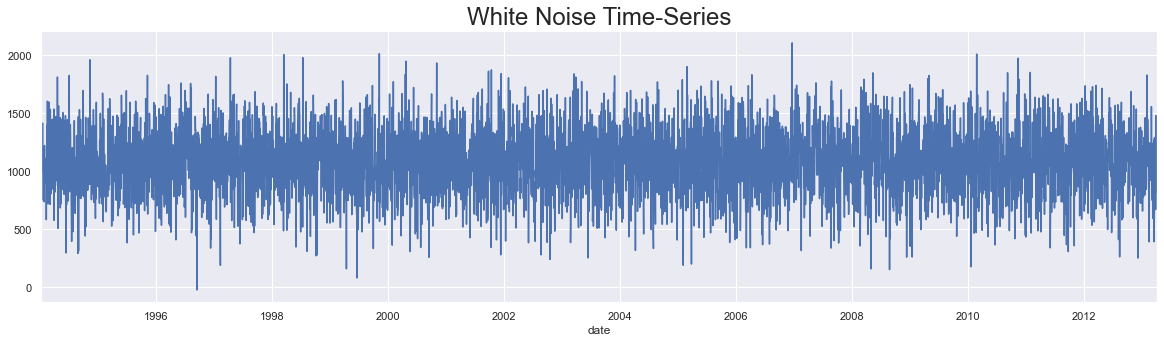

In [14]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

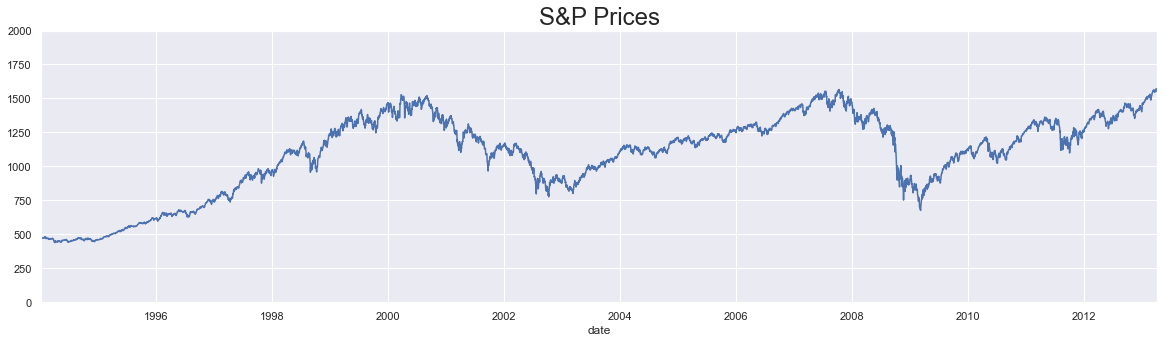

In [15]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2000)
plt.show()

### Random Walk

<b>Random walk :</b> A special type of time-series, where values tend to persist over time and differences between periodes are simply a white noise

Like if prise is P and noise or error is e then : 
Pt=Pt-1 + et


In [16]:
rw = pd.read_csv("../../data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [38]:
rw.describe()

price
count  5021.000000
mean   1269.944293
std     444.216793
min     585.483034
25%     931.550429
50%    1156.363045
75%    1488.362029
max    2715.508720

In [17]:
df['rw'] = rw.price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.head()

market_value           wn           rw
date                                              
1994-01-07        469.90  1311.725434  1122.139662
1994-01-10        475.27   767.666499  1080.347860
1994-01-11        474.13   749.833193  1082.095245
1994-01-12        474.17   749.571178  1083.639265
1994-01-13        472.47  1109.341033  1067.146255

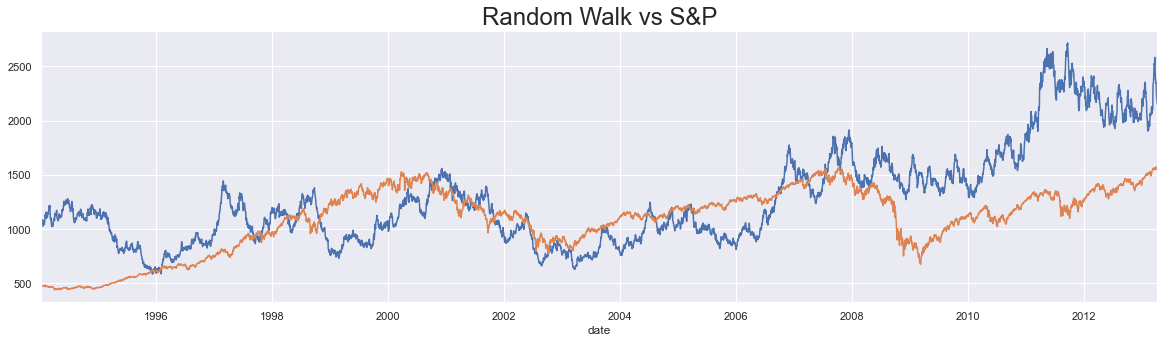

In [19]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [20]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [21]:
sts.adfuller(df.wn)

(-70.18069030431074,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70772.28468311849)

In [23]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

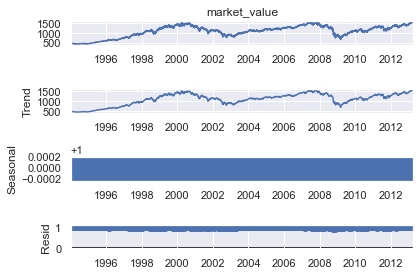

In [24]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [25]:
s_dec_multiplicative.trend

date
1994-01-07            NaN
1994-01-10            NaN
1994-01-11     473.188000
1994-01-12     474.190000
1994-01-13     473.796000
                 ...     
2013-04-01    1564.896959
2013-04-02    1563.055648
2013-04-03    1559.874260
2013-04-04            NaN
2013-04-05            NaN
Freq: B, Name: trend, Length: 5021, dtype: float64

In [26]:
s_dec_multiplicative.observed

date
1994-01-07     469.900000
1994-01-10     475.270000
1994-01-11     474.130000
1994-01-12     474.170000
1994-01-13     472.470000
                 ...     
2013-04-01    1562.173837
2013-04-02    1570.252238
2013-04-03    1553.686978
2013-04-04    1559.979316
2013-04-05    1553.278930
Freq: B, Name: market_value, Length: 5021, dtype: float64

### ACF

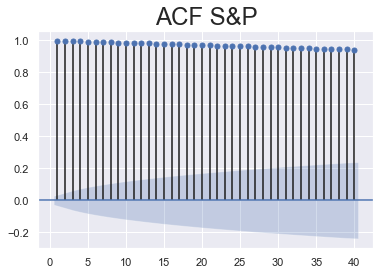

In [29]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

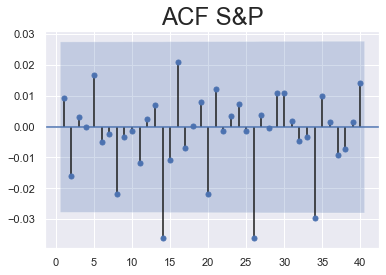

In [28]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

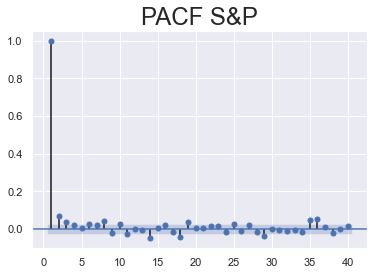

In [25]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

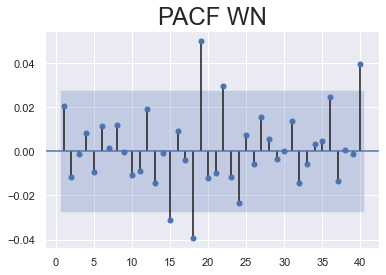

In [26]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()